<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

## 캐글 인클래스(InClass) Competitions

### 1) EDA를 수행합시다

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.
- **(객관식) H1N1 분류기의 기준모델을 설정하세요. 기준모델의 정확도를 과제 제출폼에 제출하세요.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1


In [1]:
pip install kaggle

In [2]:
!kaggle competitions download -c prediction-of-h1n1-vaccination

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
#local file 열기
from google.colab import files
uploaded=files.upload()
import io
import pandas as pd


Saving submission.csv to submission (1).csv
Saving test.csv to test (1).csv
Saving train_labels.csv to train_labels (1).csv
Saving train.csv to train (1).csv


In [4]:
#데이터 불러오기 
train_raw = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_labels_raw = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
test_raw = pd.read_csv(io.BytesIO(uploaded['test.csv']))
submission_raw = pd.read_csv(io.BytesIO(uploaded['submission.csv']))

In [5]:
train_raw.head(3)

h1n1_concern  h1n1_knowledge  ...  hhs_region          state
0           NaN             NaN  ...           9     CALIFORNIA
1           3.0             1.0  ...           7       NEBRASKA
2           2.0             1.0  ...           1  MASSACHUSETTS

[3 rows x 38 columns]

In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42154 entries, 0 to 42153
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 33734 non-null  float64
 1   h1n1_knowledge               33734 non-null  float64
 2   behavioral_antiviral_meds    33635 non-null  float64
 3   behavioral_avoidance         33482 non-null  float64
 4   behavioral_face_mask         33710 non-null  float64
 5   behavioral_wash_hands        33683 non-null  float64
 6   behavioral_large_gatherings  33640 non-null  float64
 7   behavioral_outside_home      33633 non-null  float64
 8   behavioral_touch_face        33571 non-null  float64
 9   doctor_recc_h1n1             40269 non-null  float64
 10  doctor_recc_seasonal         40269 non-null  float64
 11  chronic_med_condition        40837 non-null  float64
 12  child_under_6_months         32705 non-null  float64
 13  health_insurance

In [7]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28104 entries, 0 to 28103
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 22492 non-null  float64
 1   h1n1_knowledge               22492 non-null  float64
 2   behavioral_antiviral_meds    22432 non-null  float64
 3   behavioral_avoidance         22294 non-null  float64
 4   behavioral_face_mask         22478 non-null  float64
 5   behavioral_wash_hands        22456 non-null  float64
 6   behavioral_large_gatherings  22421 non-null  float64
 7   behavioral_outside_home      22422 non-null  float64
 8   behavioral_touch_face        22384 non-null  float64
 9   doctor_recc_h1n1             26897 non-null  float64
 10  doctor_recc_seasonal         26897 non-null  float64
 11  chronic_med_condition        27250 non-null  float64
 12  child_under_6_months         21813 non-null  float64
 13  health_insurance

In [8]:
train_labels_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42154 entries, 0 to 42153
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   vacc_h1n1_f  42154 non-null  int64
 1   vacc_seas_f  42154 non-null  int64
dtypes: int64(2)
memory usage: 658.8 KB


In [9]:
train_labels_raw.head()

vacc_h1n1_f  vacc_seas_f
0            0            0
1            0            0
2            0            0
3            0            1
4            1            0

In [48]:
train_raw.head()

h1n1_concern  h1n1_knowledge  ...  hhs_region          state
0           NaN             NaN  ...           9     CALIFORNIA
1           3.0             1.0  ...           7       NEBRASKA
2           2.0             1.0  ...           1  MASSACHUSETTS
3           2.0             2.0  ...           6      LOUISIANA
4           1.0             2.0  ...           4        ALABAMA

[5 rows x 38 columns]

In [11]:
train_labels_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42154 entries, 0 to 42153
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   vacc_h1n1_f  42154 non-null  int64
 1   vacc_seas_f  42154 non-null  int64
dtypes: int64(2)
memory usage: 658.8 KB


In [49]:
#label 과 train 합치기 
train=train_labels_raw.merge(train_raw,left_index=True,right_index=True)

In [50]:
train.head(3)

vacc_h1n1_f  vacc_seas_f  ...  hhs_region          state
0            0            0  ...           9     CALIFORNIA
1            0            0  ...           7       NEBRASKA
2            0            0  ...           1  MASSACHUSETTS

[3 rows x 40 columns]

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42154 entries, 0 to 42153
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vacc_h1n1_f                  42154 non-null  int64  
 1   vacc_seas_f                  42154 non-null  int64  
 2   h1n1_concern                 33734 non-null  float64
 3   h1n1_knowledge               33734 non-null  float64
 4   behavioral_antiviral_meds    33635 non-null  float64
 5   behavioral_avoidance         33482 non-null  float64
 6   behavioral_face_mask         33710 non-null  float64
 7   behavioral_wash_hands        33683 non-null  float64
 8   behavioral_large_gatherings  33640 non-null  float64
 9   behavioral_outside_home      33633 non-null  float64
 10  behavioral_touch_face        33571 non-null  float64
 11  doctor_recc_h1n1             40269 non-null  float64
 12  doctor_recc_seasonal         40269 non-null  float64
 13  chronic_med_cond

In [14]:
!pip install pandas-profiling==2.*

In [15]:
# train set profiling 하기 
import pandas_profiling
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/53 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
#학습데이터/ 검증데이터 나누기 - train, val
import sklearn
from sklearn.model_selection import train_test_split
train, val=train_test_split(train,train_size=0.8)

In [53]:
train.size,val.size

(1348920, 337240)

In [54]:
train

vacc_h1n1_f  vacc_seas_f  ...  hhs_region          state
13543            0            0  ...           3   PENNSYLVANIA
27942            0            1  ...           9        ARIZONA
14693            0            0  ...          10     WASHINGTON
11694            0            0  ...          10         OREGON
11074            1            1  ...           9         NEVADA
...            ...          ...  ...         ...            ...
34650            0            1  ...           3       VIRGINIA
16625            0            1  ...           1  NEW HAMPSHIRE
2129             0            1  ...           5      WISCONSIN
38478            0            0  ...           7       NEBRASKA
6425             0            0  ...          10         ALASKA

[33723 rows x 40 columns]

In [55]:
#결측치 확인 
missingcount=pd.DataFrame(train.isnull().sum(),columns=['결측치 개수'])
missingcount

결측치 개수
vacc_h1n1_f                       0
vacc_seas_f                       0
h1n1_concern                   6780
h1n1_knowledge                 6780
behavioral_antiviral_meds      6862
behavioral_avoidance           6988
behavioral_face_mask           6801
behavioral_wash_hands          6823
behavioral_large_gatherings    6859
behavioral_outside_home        6868
behavioral_touch_face          6907
doctor_recc_h1n1               1493
doctor_recc_seasonal           1493
chronic_med_condition          1057
child_under_6_months           7606
health_insurance              15483
health_worker                  7588
opinion_h1n1_vacc_effective    7059
opinion_h1n1_risk              7096
opinion_h1n1_sick_from_vacc    7131
opinion_seas_vacc_effective    7185
opinion_seas_risk              7237
opinion_seas_sick_from_vacc    7295
agegrp                            0
education_comp                 8175
raceeth4_i                        0
sex_i                             0
inc_pov                           0
marital                        8203
rent_own_r                     1760
employment_status              8271
census_region                     0
census_msa                        0
n_adult_r                       253
household_children              253
n_people_r                      108
employment_industry           20041
employment_occupation         20041
hhs_region                        0
state                             0

In [56]:
datatype=pd.DataFrame(train.dtypes,columns=['데이터 타입'])
datatype

데이터 타입
vacc_h1n1_f                    int64
vacc_seas_f                    int64
h1n1_concern                 float64
h1n1_knowledge               float64
behavioral_antiviral_meds    float64
behavioral_avoidance         float64
behavioral_face_mask         float64
behavioral_wash_hands        float64
behavioral_large_gatherings  float64
behavioral_outside_home      float64
behavioral_touch_face        float64
doctor_recc_h1n1             float64
doctor_recc_seasonal         float64
chronic_med_condition        float64
child_under_6_months         float64
health_insurance             float64
health_worker                float64
opinion_h1n1_vacc_effective   object
opinion_h1n1_risk             object
opinion_h1n1_sick_from_vacc   object
opinion_seas_vacc_effective   object
opinion_seas_risk             object
opinion_seas_sick_from_vacc   object
agegrp                        object
education_comp               float64
raceeth4_i                     int64
sex_i                          int64
inc_pov                        int64
marital                      float64
rent_own_r                   float64
employment_status             object
census_region                  int64
census_msa                    object
n_adult_r                    float64
household_children           float64
n_people_r                   float64
employment_industry           object
employment_occupation         object
hhs_region                     int64
state                         object

In [57]:
missingcount.merge(datatype,left_index=True,right_index=True)

결측치 개수   데이터 타입
vacc_h1n1_f                       0    int64
vacc_seas_f                       0    int64
h1n1_concern                   6780  float64
h1n1_knowledge                 6780  float64
behavioral_antiviral_meds      6862  float64
behavioral_avoidance           6988  float64
behavioral_face_mask           6801  float64
behavioral_wash_hands          6823  float64
behavioral_large_gatherings    6859  float64
behavioral_outside_home        6868  float64
behavioral_touch_face          6907  float64
doctor_recc_h1n1               1493  float64
doctor_recc_seasonal           1493  float64
chronic_med_condition          1057  float64
child_under_6_months           7606  float64
health_insurance              15483  float64
health_worker                  7588  float64
opinion_h1n1_vacc_effective    7059   object
opinion_h1n1_risk              7096   object
opinion_h1n1_sick_from_vacc    7131   object
opinion_seas_vacc_effective    7185   object
opinion_seas_risk              7237   object
opinion_seas_sick_from_vacc    7295   object
agegrp                            0   object
education_comp                 8175  float64
raceeth4_i                        0    int64
sex_i                             0    int64
inc_pov                           0    int64
marital                        8203  float64
rent_own_r                     1760  float64
employment_status              8271   object
census_region                     0    int64
census_msa                        0   object
n_adult_r                       253  float64
household_children              253  float64
n_people_r                      108  float64
employment_industry           20041   object
employment_occupation         20041   object
hhs_region                        0    int64
state                             0   object

In [58]:
#결측치 대체- 시나리오 1 -최빈값으로 대체 
import numpy as np
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
SimpleImputer()


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [59]:
#train & val 데이터에 적용하기
train_imputed =imputer.fit_transform(train)
val_imputed = imputer.transform(val)

In [60]:
print(train_imputed)

[[0 0 1.0 ... 'Food Preparation and Serving Related Occupations' 3
  'PENNSYLVANIA']
 [0 1 0.0 ... 'Management Occupations' 9 'ARIZONA']
 [0 0 2.0 ... 'Community and Social Services Occupations' 10 'WASHINGTON']
 ...
 [0 1 2.0 ... 'Management Occupations' 5 'WISCONSIN']
 [0 0 1.0 ... 'Production Occupations' 7 'NEBRASKA']
 [0 0 0.0 ... 'Building and Grounds Cleaning and Maintenance Occupations'
  10 'ALASKA']]


In [25]:
!pip install numpy --upgrade

In [ ]:
#imputed잘 됐는지 확인 하고 싶은데 np.isnan이 안먹음...

In [61]:
test=test_raw

In [62]:
#특성 엔지니어링

def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""
    
    # 높은 카디널리티를 가지는 특성을 제거합니다.
    selected_cols = df.select_dtypes(include=['number', 'object'])
    labels = selected_cols.nunique() # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist() # 카디널리티가 30보다 작은 특성만 선택합니다.
    df = df[selected_features]
    
    # 새로운 특성을 생성합니다.
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behv'] = df[behaviorals].sum(axis=1)
    
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    df.drop(columns=dels, inplace=True)

    opinions=[col for col in df.columns if 'opinion' in col]
    df['opi']=df[opinions].sum(axis=1)

    docrecs=[col for col in df.columns if 'doctor' in col]
    df['doc']=df[docrecs].sum(axis=1)

    # 새롭게 만든 특성 raw columns 를 제거합니다.
    df.drop(columns=behaviorals,inplace=True)
    df.drop(columns=opinions,inplace=True)
    df.drop(columns=docrecs,inplace=True)

    return df


In [73]:
train_eng = engineer(train)
val_eng = engineer(val)
test_eng = engineer(test)

In [64]:
train_eng.head(3)

vacc_h1n1_f  h1n1_concern  h1n1_knowledge  ...  behv  opi  doc
13543            0           1.0             1.0  ...   3.0  0.0  1.0
27942            0           0.0             0.0  ...   0.0  0.0  0.0
14693            0           2.0             1.0  ...   3.0  0.0  0.0

[3 rows x 23 columns]

In [65]:
val_eng.head(3)

vacc_h1n1_f  h1n1_concern  h1n1_knowledge  ...  behv  opi  doc
34971            0           3.0             1.0  ...   3.0  0.0  1.0
27288            0           1.0             2.0  ...   0.0  0.0  0.0
4287             0           1.0             1.0  ...   2.0  0.0  0.0

[3 rows x 23 columns]

In [66]:
train_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33723 entries, 13543 to 6425
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vacc_h1n1_f            33723 non-null  int64  
 1   h1n1_concern           26943 non-null  float64
 2   h1n1_knowledge         26943 non-null  float64
 3   chronic_med_condition  32666 non-null  float64
 4   child_under_6_months   26117 non-null  float64
 5   health_insurance       18240 non-null  float64
 6   health_worker          26135 non-null  float64
 7   agegrp                 33723 non-null  object 
 8   education_comp         25548 non-null  float64
 9   raceeth4_i             33723 non-null  int64  
 10  sex_i                  33723 non-null  int64  
 11  inc_pov                33723 non-null  int64  
 12  marital                25520 non-null  float64
 13  rent_own_r             31963 non-null  float64
 14  census_region          33723 non-null  int64  
 15 

In [ ]:
train_eng['vacc_h1n1_f']

In [74]:
#train X,y / val X,y 나누기  (Target - vacc_h1n1_f, /vacc_seas_f)
y_train=train_eng['vacc_h1n1_f']
X_train=train_eng.drop(columns='vacc_h1n1_f',axis=1)
y_val=val_eng['vacc_h1n1_f']
X_val=val_eng.drop(columns='vacc_h1n1_f',axis=1)

In [105]:
test=test_eng
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28104 entries, 0 to 28103
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   h1n1_concern           22492 non-null  float64
 1   h1n1_knowledge         22492 non-null  float64
 2   chronic_med_condition  27250 non-null  float64
 3   child_under_6_months   21813 non-null  float64
 4   health_insurance       15364 non-null  float64
 5   health_worker          21834 non-null  float64
 6   agegrp                 28104 non-null  object 
 7   education_comp         21293 non-null  float64
 8   raceeth4_i             28104 non-null  int64  
 9   sex_i                  28104 non-null  int64  
 10  inc_pov                28104 non-null  int64  
 11  marital                21281 non-null  float64
 12  rent_own_r             26664 non-null  float64
 13  census_region          28104 non-null  int64  
 14  census_msa             28104 non-null  object 
 15  n_

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33723 entries, 13543 to 6425
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   h1n1_concern           26943 non-null  float64
 1   h1n1_knowledge         26943 non-null  float64
 2   chronic_med_condition  32666 non-null  float64
 3   child_under_6_months   26117 non-null  float64
 4   health_insurance       18240 non-null  float64
 5   health_worker          26135 non-null  float64
 6   agegrp                 33723 non-null  object 
 7   education_comp         25548 non-null  float64
 8   raceeth4_i             33723 non-null  int64  
 9   sex_i                  33723 non-null  int64  
 10  inc_pov                33723 non-null  int64  
 11  marital                25520 non-null  float64
 12  rent_own_r             31963 non-null  float64
 13  census_region          33723 non-null  int64  
 14  census_msa             33723 non-null  object 
 15 

In [ ]:
X_train

In [ ]:
y_train

In [78]:
#기준모델 설정
from collections import Counter
Counter(train_eng['vacc_h1n1_f'])


Counter({0: 25654, 1: 8069})

In [80]:
basemodel=25654/(8069+25654)
basemodel
#기준모델 -> 3. 0.76

0.7607271001986775

### 2) 모델 개발
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요
- **검증세트의 F1-score를 과제 제출폼에 제출하세요. (0.5 이상 통과)**

In [83]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 5.3 MB/s 


In [84]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [85]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(OneHotEncoder(use_cat_names=True),SimpleImputer(),DecisionTreeClassifier(random_state=1, criterion='entropy'))

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도:  0.9900364736233431
검증 정확도:  0.7279089076028941


In [92]:
#과적합이나 하이퍼파라미터 조정-min_samples_leaf=1000,max_depth=6
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(OneHotEncoder(use_cat_names=True),SimpleImputer(),DecisionTreeClassifier(min_samples_leaf=1000,max_depth=6,random_state=1, criterion='entropy'))

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도:  0.8058298490644368
검증 정확도:  0.8082078045308979


In [98]:
#과적합이나 하이퍼파라미터 조정-min_samples_leaf=5000,max_depth=6
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(OneHotEncoder(use_cat_names=True),SimpleImputer(),DecisionTreeClassifier(min_samples_leaf=5000,max_depth=6,random_state=1, criterion='entropy'))

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도:  0.7883343712006642
검증 정확도:  0.7837741667655083


In [86]:
pipe.named_steps

{'decisiontreeclassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1, splitter='best'),
 'onehotencoder': OneHotEncoder(cols=['agegrp', 'census_msa'], drop_invariant=False,
               handle_missing='value', handle_unknown='value', return_df=True,
               use_cat_names=True, verbose=0),
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0)}

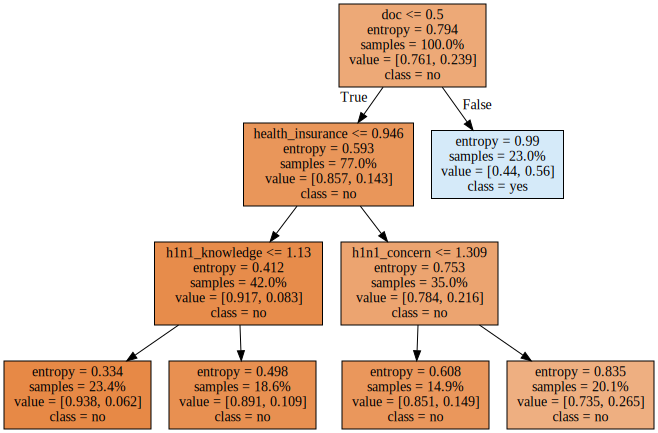

In [101]:

import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

In [99]:
y_val_pred=pipe.predict(X_val)
y_val_pred

array([1, 0, 0, ..., 0, 0, 0])

In [100]:
#F1 Score
sklearn.metrics.f1_score(y_val,y_val_pred)

0.5409216821959205

In [ ]:
#검증세트의 F1-score를 과제 제출폼에 제출하세요. (0.5 이상 통과) -> 0.54

### 3) 캐글 대회 참여

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
- **캐글 Leaderboard의 본인 Score를 과제 제출폼에 제출하세요.**
 

In [107]:
y_test_pred=pipe.predict(test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [108]:
len(y_test_pred)

28104

## 🔥 도전과제

### 4) 다른 종류의 imputer를 사용하고 특성-타겟 관계 그래프를 나타내 보세요.
- 다른 종류의 imputer를 사용해 보세요([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###